In [2]:
import pandas as pd

# 假设数据文件为 CSV 格式
data_url = "users_combined_info_500.csv"
df = pd.read_csv(data_url)

# 查看数据的前几行
df.head()


,user_id,name,location,total_influence,country,event_type,event_action,event_time
0,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:28:37+08:00
1,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-26 20:42:57+08:00
2,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 04:10:46+08:00
3,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 17:43:50+08:00
4,663432,bdraco,"Houston, TX",1776.967163,United States,CreateEvent,added,2024-11-27 19:56:34+08:00


In [41]:
# 国家和地区分布
country_distribution = df['country'].value_counts()

# 输出结果
country_distribution.head()


country
United States     305788
Germany           182659
China              73011
United Kingdom     71606
France             59570
Name: count, dtype: int64

In [40]:
# 城市分布
df['city']= df['location'].str.split(',').str[0]
city_distribution = df['city'].value_counts()

# 输出结果
city_distribution.head()


city
Germany          111786
Prague            39461
San Francisco     27542
Japan             26986
Berlin            25978
Name: count, dtype: int64

In [39]:
people = df.groupby("name").first()
# 国家和地区分布
country_people = people['country'].value_counts()

# 输出结果
country_people.head()

country
United States    122
Germany           59
China             34
France            24
Canada            24
Name: count, dtype: int64

In [38]:
# 城市分布
city_people = people['city'].value_counts()

# 输出结果
city_people.head()

city
Germany          25
Berlin           12
San Francisco    11
Seattle           8
Paris             8
Name: count, dtype: int64

In [5]:
time_zone=pd.to_datetime(df['event_time'])
time_zone

0         2024-11-26 20:28:37+08:00
1         2024-11-26 20:42:57+08:00
2         2024-11-27 04:10:46+08:00
3         2024-11-27 17:43:50+08:00
4         2024-11-27 19:56:34+08:00
                     ...           
1294771   2024-10-04 15:51:52+08:00
1294772   2024-10-15 11:34:32+08:00
1294773   2024-10-16 07:04:20+08:00
1294774   2024-10-07 14:36:44+08:00
1294775   2024-10-17 08:24:03+08:00
Name: event_time, Length: 1294776, dtype: datetime64[ns, UTC+08:00]

In [6]:
country_timezones = {
    'United States': '东五区到西八区',  # 美国跨多个时区
    'Germany': '东一区',
    'China': '东八区',
    'United Kingdom': '零时区',
    'France': '东一区',
    'Canada': '东三区到西八区',  # 加拿大跨多个时区
    'Netherlands': '东一区',
    'Czechia': '东一区',
    'Japan': '东九区',
    'Switzerland': '东一区',
    'Australia': '西八区到东十区',  # 澳大利亚跨多个时区
    'Italy': '东一区',
    'Poland': '东一区',
    'New Zealand': '东十二区',
    'Spain': '东一区',
    'Austria': '东一区',
    'Sweden': '东一区',
    'Finland': '东二区',
    'Denmark': '东一区',
    'Bulgaria': '东二区',
    'Hungary': '东一区',
    'Belgium': '东一区',
    'Norway': '东一区',
    'India': '东五区半',
    'United Arab Emirates': '东四区',
    'Singapore': '东八区',
    'Brazil': '西三区到西五区',  # 巴西跨多个时区
    'Hong Kong': '东八区',
    'Malaysia': '东八区',
    'Pakistan': '东五区',
    'Indonesia': '东七区到东九区',  # 印度尼西亚跨多个时区
    'Russia': '东二区到东十二区',  # 俄罗斯跨多个时区
    'Taiwan': '东八区',
    'Tunisia': '东一区',
    'Ethiopia': '东三区',
    'Colombia': '西五区',
    'Slovenia': '东一区',
    'South Korea': '东九区',
    'Ireland': '零时区',
    'Vietnam': '东七区',
    'Lebanon': '东二区',
    'Ecuador': '西五区',
    'Greece': '东二区',
    'Portugal': '零时区',
    'Kenya': '东三区',
    'Egypt': '东二区',
    'Georgia': '东四区',
    'Estonia': '东二区',
    'Lithuania': '东二区',
    'South Africa': '东二区',
    'Türkiye': '东三区',
    'Israel': '东二区'
}
def get_time_zone(country):
    return country_timezones.get(country)
# 时区分布
df['timezone'] = df['country'].apply(get_time_zone)
# 输出转换后的时间和时区
timezone_distribution = df['timezone'].value_counts()

# 输出结果
timezone_distribution


timezone
东一区         500521
东五区到西八区     305788
东八区          91337
零时区          76182
东三区到西八区      58600
东九区          49081
西八区到东十区      35746
东二区          27477
东十二区         18444
东四区           7109
东五区半          5689
东三区           5630
西三区到西五区       5022
西五区           4769
东五区           4462
东七区到东九区       4248
东二区到东十二区      4087
东七区           2433
Name: count, dtype: int64

In [44]:
people['timezone'] = people['country'].apply(get_time_zone)
time_zone = people['timezone'].value_counts()
time_zone.head()

timezone
东一区        176
东五区到西八区    122
东八区         44
东三区到西八区     24
零时区         24
Name: count, dtype: int64

In [59]:
# 提交频率分析
# 输出前几个高活跃用户
frequency = df[['name','event_action']].groupby('name').agg({'event_action': 'count'})
frequency = frequency['event_action'].sort_values(ascending=False)

In [60]:
frequency.head(10)

name
arlac77               37960
MilosKozak            36400
danielroe             30616
chenrui333            20300
ConfluentSemaphore    19215
taiki-e               14505
khipp                 12905
bot-targa             12704
frenck                11218
bdraco                10764
Name: event_action, dtype: int64

In [62]:
frequency.tail(10)

name
lvhan028           750
innerdvations      743
cirospaciari       650
zhangdaiscott      644
meeseeksmachine    635
Court72            621
brophdawg11        599
javsalgar          582
Electroid          485
tmcconechy          75
Name: event_action, dtype: int64

In [ ]:
#其他维度：将提交频率与城市结合，判断高频城市
# 将城市和提交频率进行合并
city_submission = df[['city','event_action']].groupby('city').agg({'event_action': 'count'})

# 输出城市与提交频率的关系
city_submission['event_action'].sort_values(ascending=False).head(10)


city
Germany          111786
Prague            39461
San Francisco     27542
Japan             26986
Berlin            25978
New York          24334
Paris             19516
Palo Alto         19215
London            18400
UK                17789
Name: event_action, dtype: int64

In [30]:
#将influence和提交频率结合，判断activity的价值
record_counts = df.groupby('name').size()
value_df = df.groupby('name').first()
value_df["value(influence per activity)"] = value_df['total_influence']/record_counts
value_df = value_df["value(influence per activity)"].sort_values(ascending=False)
value_df.head(10)

name
tmcconechy         5.693270
Electroid          0.723762
hiyouga            0.696599
meeseeksmachine    0.692151
Court72            0.685343
javsalgar          0.618979
brophdawg11        0.573656
bradfitz           0.564527
cirospaciari       0.563635
andrasbacsai       0.533460
Name: value(influence per activity), dtype: float64

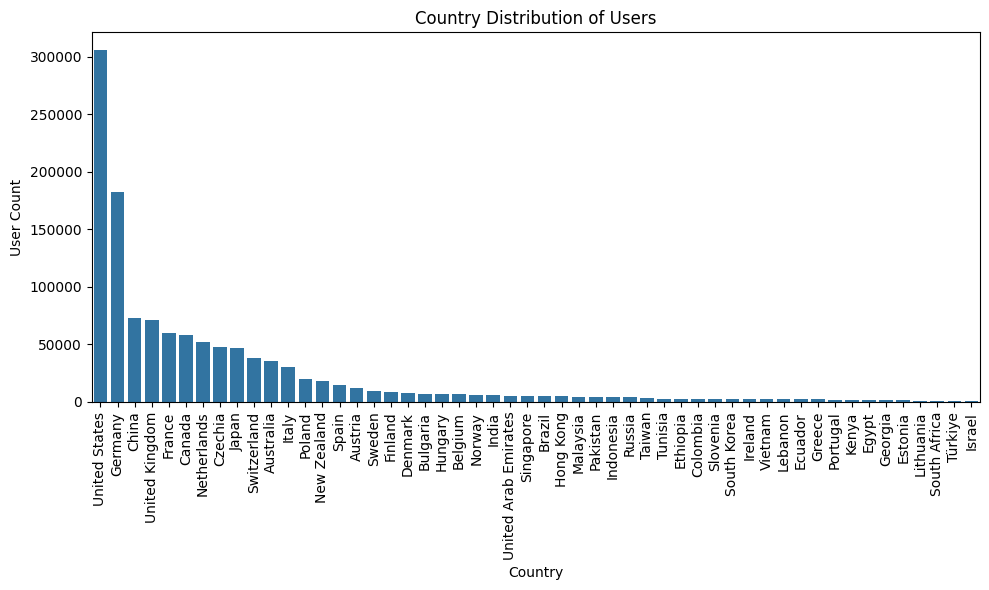

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 可视化国家分布
plt.figure(figsize=(10, 6))
sns.barplot(x=country_distribution.index, y=country_distribution.values)
plt.xticks(rotation=90)
plt.title("Country Distribution of Users")
plt.xlabel("Country")
plt.ylabel("User Count")
plt.tight_layout()
plt.show()
